In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns",14)
pd.set_option("display.max_row",100)

In [3]:
dt = pd.read_csv("Churn_Modelling.csv")
dt.set_index("RowNumber",inplace=True)
dt.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [4]:
dt.set_index("CustomerId",inplace=True)
dt.head(10)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [5]:
dt_1 = dt.drop("Surname",axis=1)

In [6]:
dt_1.shape

(10000, 11)

In [7]:
dt_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [8]:
dt_1.dtypes.value_counts()

int64      7
float64    2
object     2
dtype: int64

In [9]:
(dt_1.isna().sum()*100/dt_1.shape[0]).sort_values()

CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [10]:
dt_1['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [11]:
dt_1["CreditScore"] = dt_1["CreditScore"].astype("float")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

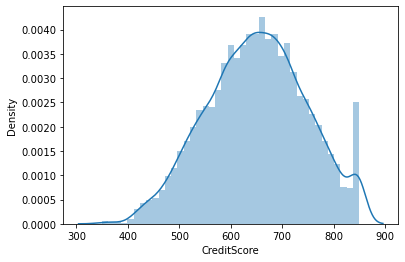

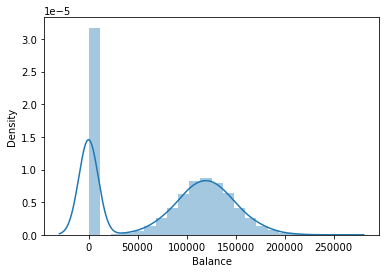

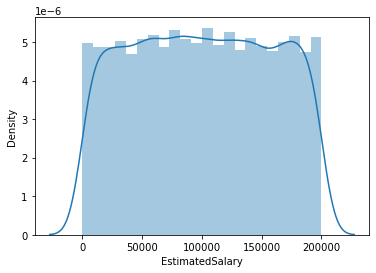

In [12]:
for col in dt_1.select_dtypes("Float64"):
    plt.figure()
    sns.distplot(dt_1[col])

In [13]:
for col in dt_1.select_dtypes("int64"):
    print(f'{col :-<20}  {dt_1[col].nunique()}')

Age-----------------  70
Tenure--------------  11
NumOfProducts-------  4
HasCrCard-----------  2
IsActiveMember------  2
Exited--------------  2


In [14]:
for col in dt_1.select_dtypes("object"):
    print(f'{col :-<20}  {dt_1[col].nunique()}')

Geography-----------  3
Gender--------------  2


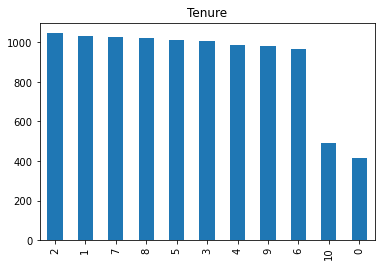

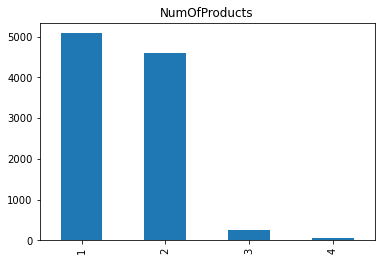

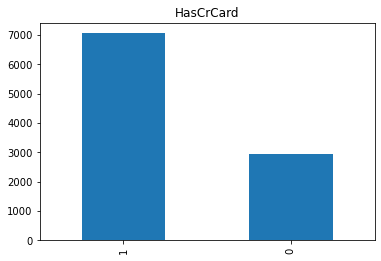

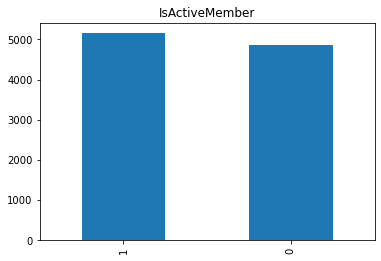

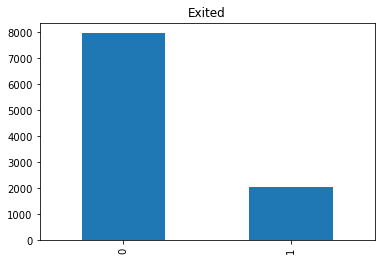

In [15]:
for col in dt_1.drop("Age",axis=1).select_dtypes("int64"):
    plt.figure()
    dt_1[col].value_counts().plot.bar()
    plt.title(col)

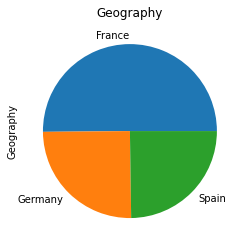

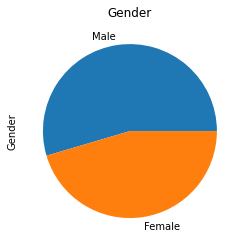

In [16]:
for col in dt_1.select_dtypes("object"):
    plt.figure()
    dt_1[col].value_counts().plot.pie()
    plt.title(col)

display the distribution of the age's


<Figure size 432x288 with 0 Axes>

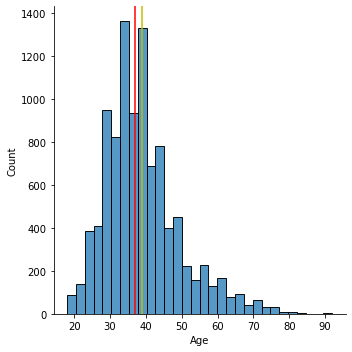

In [17]:
print("display the distribution of the age's")
plt.figure()
sns.displot(dt_1["Age"], bins=30)
plt.axvline(dt_1["Age"].mean(), color ="y")
plt.axvline(dt_1["Age"].median(), color='r')
plt.show()

In [18]:
dt_1["Age"].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [19]:
dt_1["Age"].value_counts()

37    478
38    477
35    474
36    456
34    447
33    442
40    432
39    423
32    418
31    404
41    366
29    348
30    327
42    321
43    297
28    273
44    257
45    229
46    226
27    209
26    200
47    175
48    168
25    154
49    147
50    134
24    132
51    119
52    102
23     99
54     84
22     84
55     82
57     75
53     74
56     70
58     67
59     62
60     62
61     53
21     53
62     52
63     40
20     40
67     37
64     37
66     35
19     27
71     27
69     22
18     22
72     21
68     19
74     18
70     18
65     18
73     13
76     11
77     10
75      9
78      5
79      4
81      4
80      3
84      2
92      2
88      1
82      1
85      1
83      1
Name: Age, dtype: int64

In [20]:
dt_1_p = dt_1[dt_1["Exited"] == 1]
dt_1_n = dt_1[dt_1["Exited"] == 0]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

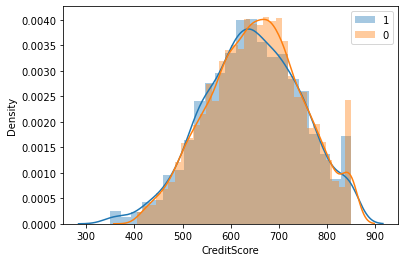

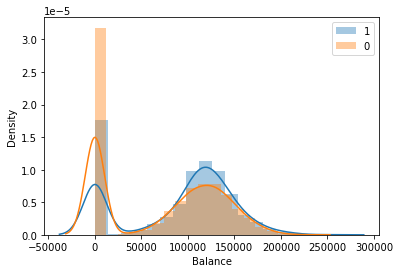

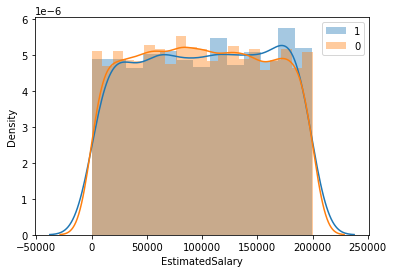

In [21]:
for col in dt_1.select_dtypes("Float64"):
    plt.figure()
    sns.distplot(dt_1_p[col], label="1")
    sns.distplot(dt_1_n[col], label="0")
    plt.legend()

<AxesSubplot:xlabel='Age', ylabel='count'>

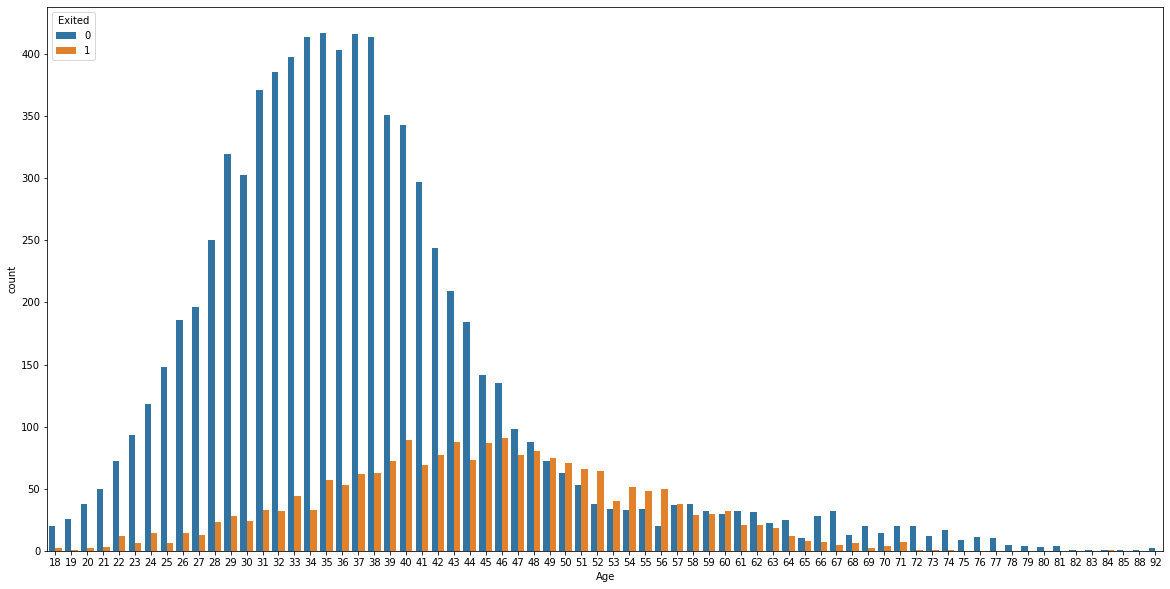

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age', hue='Exited', data=dt_1)

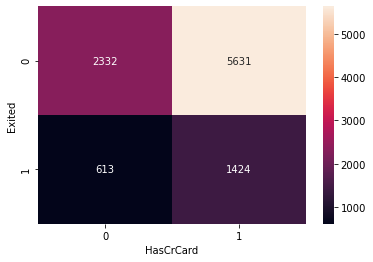

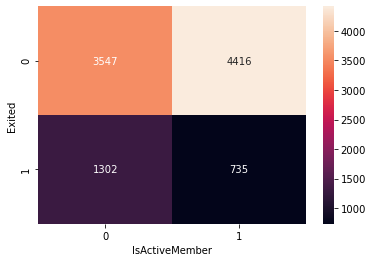

In [23]:
for col in dt_1.drop(columns=["Age","Exited","Tenure","NumOfProducts"]).select_dtypes("int64","object"):
    plt.figure()
    sns.heatmap(pd.crosstab(dt_1['Exited'], dt_1[col]), annot=True, fmt='d')

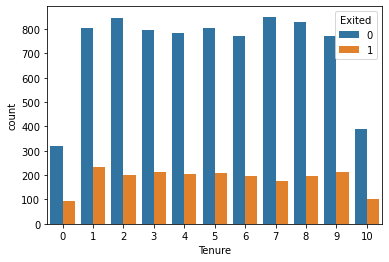

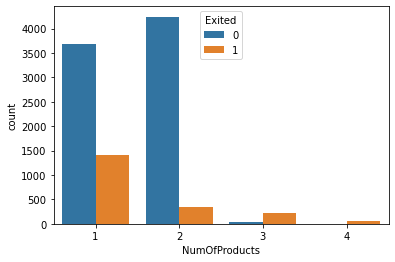

In [24]:
for col in ["Tenure","NumOfProducts"]:
    plt.figure()
    sns.countplot(x=col,hue='Exited',data=dt_1)

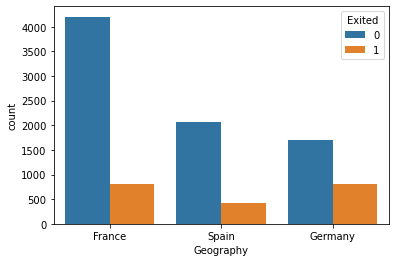

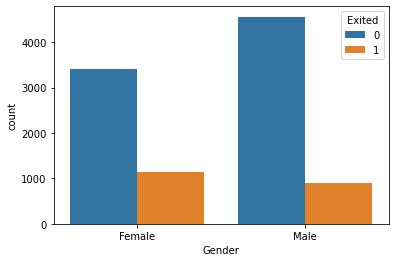

In [25]:
for col in dt_1.select_dtypes("object"):
    plt.figure()
    sns.countplot(x=col,hue='Exited',data=dt_1)

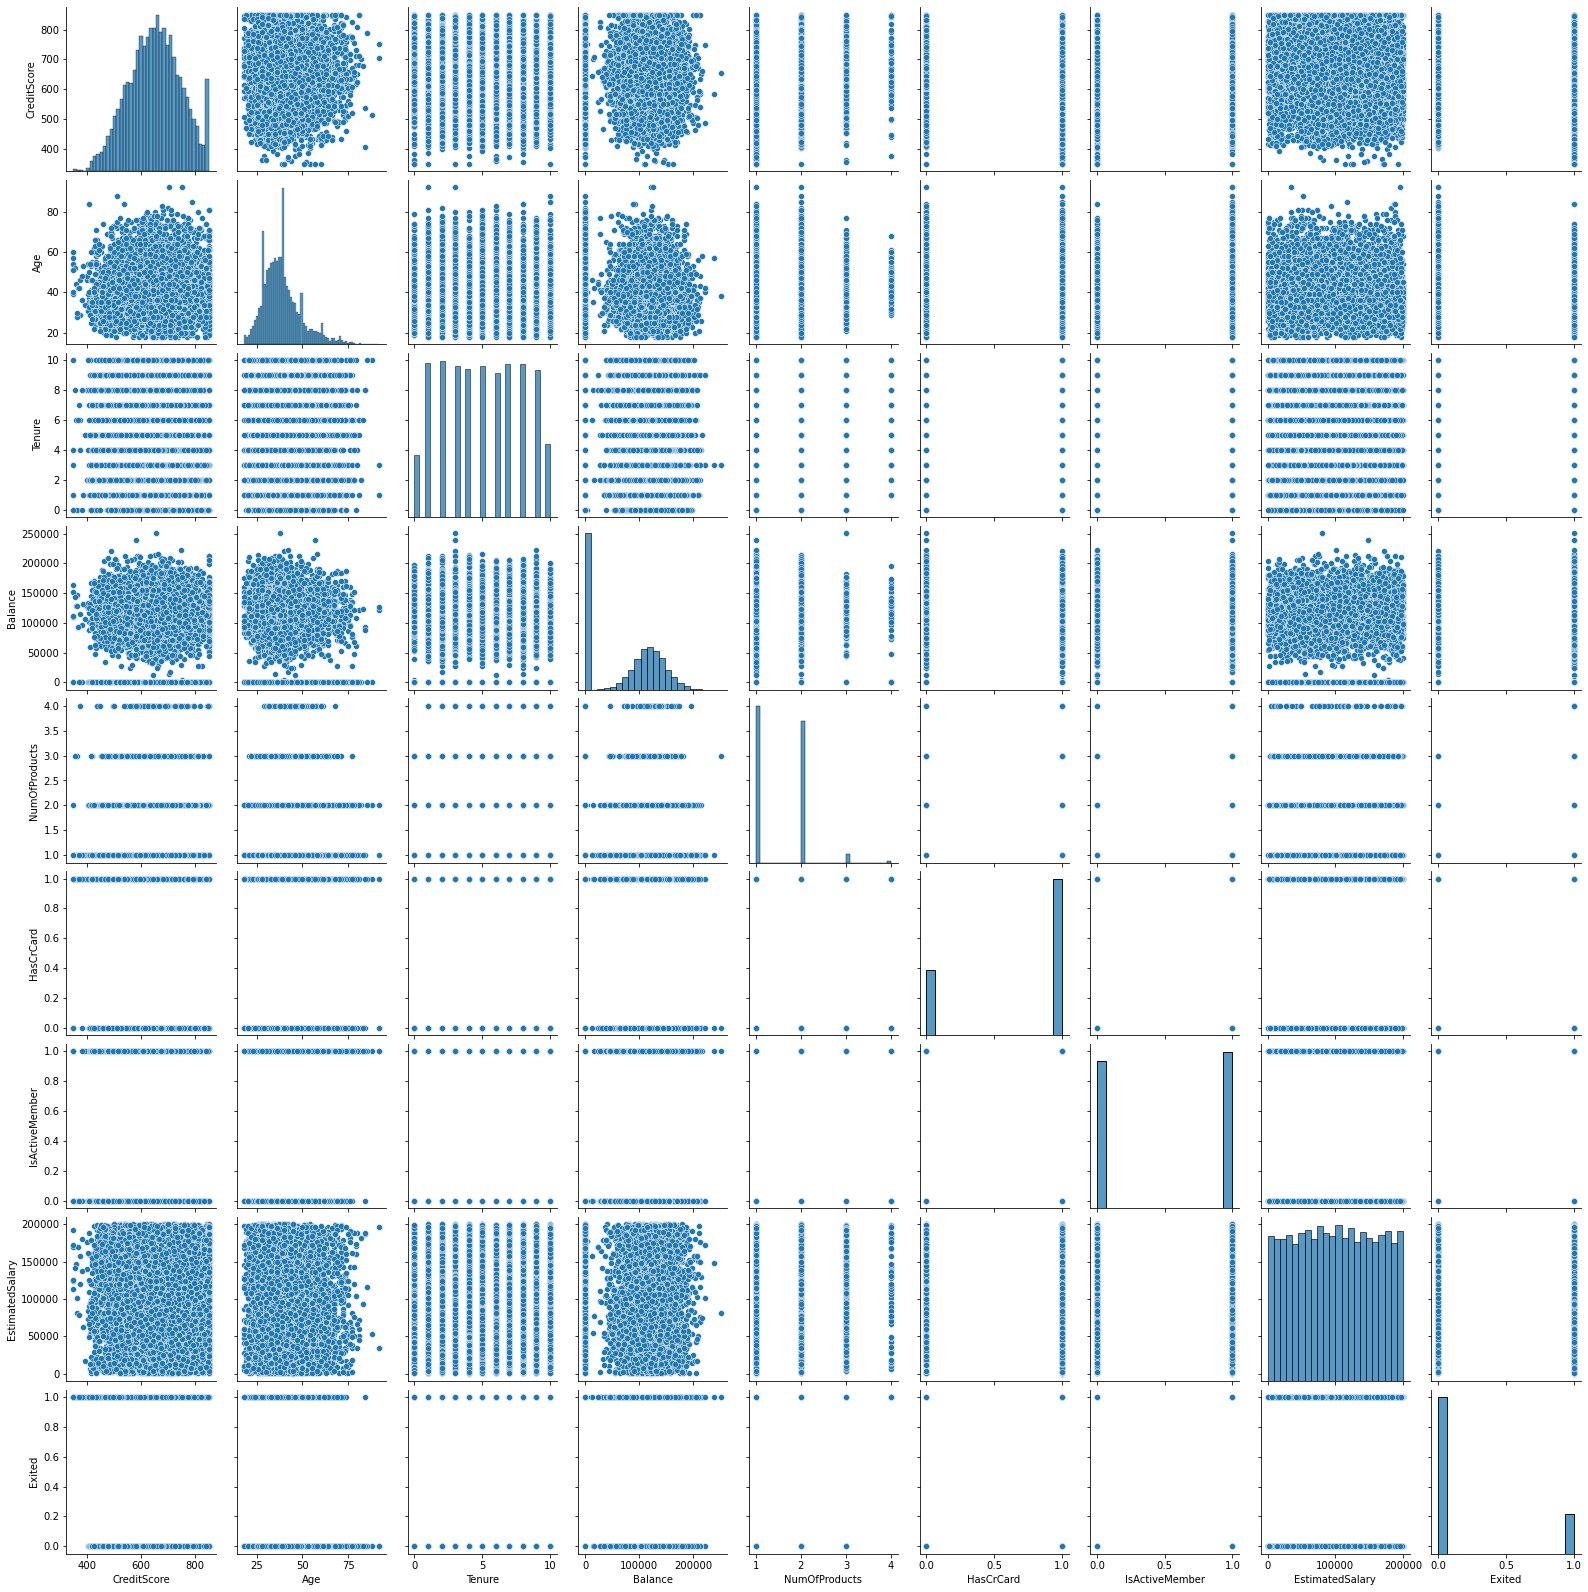

In [26]:
sns.pairplot(dt_1)

<AxesSubplot:>

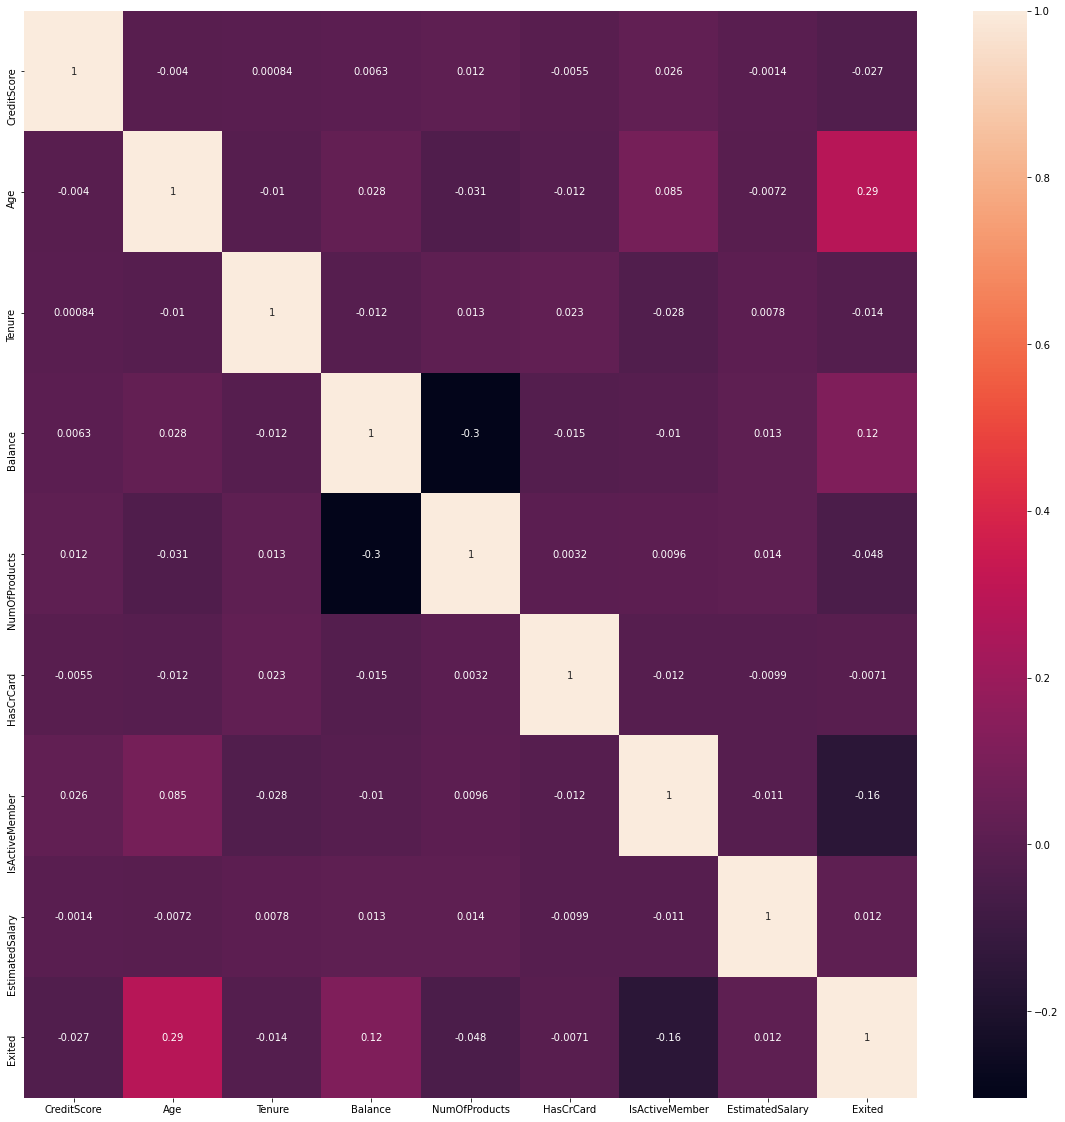

In [27]:
dfcorr = dt_1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(dfcorr,annot=True)

In [28]:
dfcorr["Exited"].sort_values()

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
Tenure            -0.014001
HasCrCard         -0.007138
EstimatedSalary    0.012097
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

In [29]:
dt_1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
dt_1=dt_1.reset_index()
dt_ml = dt_1.drop("CustomerId",axis=1)

In [33]:
dt_ml.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
dt_ml.shape

(10000, 11)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.compose import make_column_transformer

In [66]:
dt_ml["Geography"] = LabelEncoder().fit_transform(dt_ml["Geography"])
dt_ml["Gender"] = LabelEncoder().fit_transform(dt_ml["Gender"])

In [75]:
preprocessor = make_column_transformer((StandardScaler(),["CreditScore","Balance","EstimatedSalary"]))
dt_ml[["CreditScore","Balance","EstimatedSalary"]] = preprocessor.fit_transform(dt_ml)

In [76]:
x_train,x_test,y_train,y_test = train_test_split(dt_ml.drop("Exited",axis=1),dt_ml["Exited"],test_size=0.2)

In [79]:
x_train.shape

(8000, 10)

In [78]:
import tensorflow as tf

In [113]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(10)))
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="sigmoid"))
model.add(tf.keras.layers.Dense(2))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               5632      
_________________________________________________________________
dense_11 (Dense)             (None, 100)               51300     
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 202       
Total params: 57,134
Trainable params: 57,134
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"],
)

C:\Users\hp\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [115]:
model.fit(x_train, y_train, batch_size=5, epochs=10)

Epoch 1/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.4670 - accuracy: 0.7960
Epoch 2/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.4490 - accuracy: 0.7975
Epoch 3/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.4366 - accuracy: 0.8084
Epoch 4/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.4271 - accuracy: 0.8120
Epoch 5/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.4172 - accuracy: 0.8207
Epoch 6/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4065 - accuracy: 0.8275
Epoch 7/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.4004 - accuracy: 0.8350
Epoch 8/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.3919 - accuracy: 0.8391
Epoch 9/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.3854 - accuracy: 0.8445
Epoch 10/10
1600/1600 [==============================] - 6s 3ms/step - loss: 0.386

In [116]:
test_loss, test_acc = model.evaluate(x_test,  y_test)
print('Test accuracy:', test_acc)

63/63 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.8390
Test accuracy: 0.8389999866485596


In [125]:
prediction_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predict_proba = prediction_model.predict(x_test)
predictions = np.argmax(predict_proba, axis=1)

print(predictions[:20])
print(y_test.values[:20])

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
